In [1]:
import project1 as p1
import utils
import numpy as np

In [2]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Perceptron valid: [(1, 0.64), (5, 0.684), (10, 0.69), (15, 0.726), (25, 0.728), (50, 0.754)]
Best Perceptron = 0.7540, T=50.0000
Avg Perceptron valid: [(1, 0.732), (5, 0.746), (10, 0.752), (15, 0.748), (25, 0.744), (50, 0.752)]
Best Avg Perceptron = 0.7520, T=10.0000
Pegasos valid: tune T [(1, 0.686), (5, 0.726), (10, 0.748), (15, 0.746), (25, 0.768), (50, 0.752)]
Best Pegasos T = 0.7680, T=25.0000
Pegasos valid: tune L [(0.001, 0.768), (0.01, 0.768), (0.1, 0.718), (1, 0.52), (10, 0.51)]
Best Pegasos L = 0.7680, L=0.0010


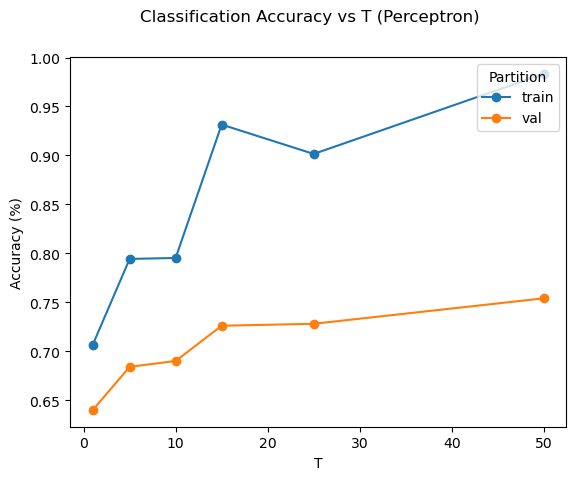

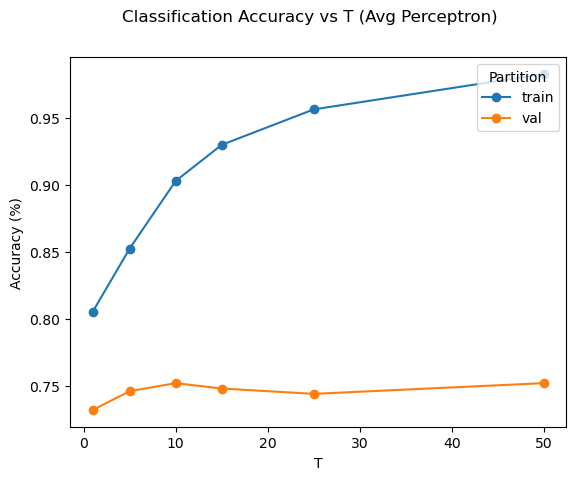

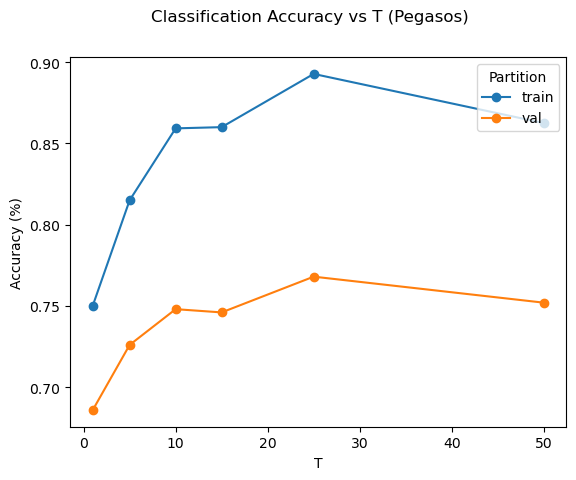

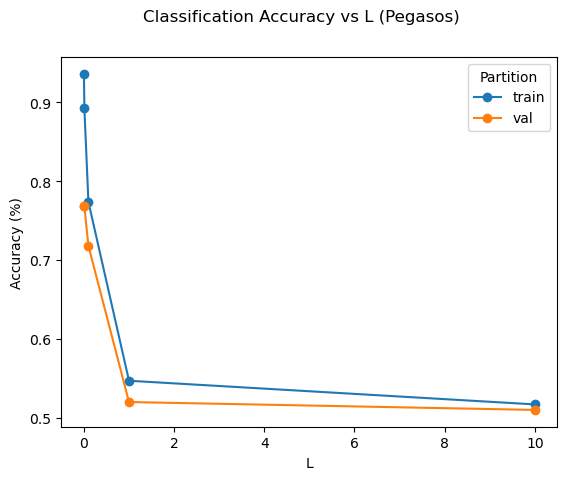

In [3]:
#-------------------------------------------------------------------------------
# Problem 8
#-------------------------------------------------------------------------------

data = (train_bow_features, train_labels, val_bow_features, val_labels)

# Values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

# Tune Perceptron
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('Perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('Best Perceptron = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

# Tune Average Perceptron
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('Avg Perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('Best Avg Perceptron = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# Tune Pegasos with fixed lambda
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('Best Pegasos T = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

# Tune Pegasos with fixed T
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('Best Pegasos L = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

# Plot tuning results
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

In [4]:
best_model = 'perceptron'  # Change based on which model had the highest validation accuracy
best_T = 50  # Change based on the best T from tuning
best_L = 0.01  # Change based on the best L from tuning

if best_model == 'perceptron':
    best_theta, best_theta_0 = perceptron(train_bow_features, train_labels, best_T)
elif best_model == 'avg_perceptron':
    best_theta, best_theta_0 = average_perceptron(train_bow_features, train_labels, best_T)
elif best_model == 'pegasos':
    best_theta, best_theta_0 = pegasos(train_bow_features, train_labels, best_T, best_L)

test_predictions = classify(test_bow_features, best_theta, best_theta_0)
test_accuracy = accuracy(test_predictions, test_labels)

print(f"Test accuracy for best model ({best_model}): {test_accuracy:.4f}")

NameError: name 'perceptron' is not defined

In [ ]:
wordlist = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)

print("Most Explanatory Word Features")
print(sorted_word_features[:10])